# Kmeans for PoS

## 0. Data Loading : NOUNS, VERBS, ADJ

In [1]:
import pandas as pd

# WE Loading
all_n_we = pd.read_csv('../Data/FlauBERT_WE/all_nouns_we.csv', index_col=0).drop(columns=["number", "gender"])
all_a_we = pd.read_csv('../Data/FlauBERT_WE/all_adjectives_we.csv', index_col=0).drop(columns = ["number", "gender"])
all_v_we = pd.read_csv('../Data/FlauBERT_WE/all_verb_we.csv', index_col=0)


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
import sys
sys.path.append('../Util')
from clustering import dimension_clustering_with_ARI

## 1. NOUN vs not-NOUN

In [3]:
# label 1: NOUN, 0: not NOUN
all_n_we["noun"] = 1
all_av_we = pd.concat([all_a_we, all_v_we])
all_av_we["noun"] = 0

# Normalization and concatenation
df = pd.concat([all_av_we, all_n_we])
norm_df = (df - df.min()) / (df.max() - df.min())

# Removing words having multiple POS
word, count = np.unique(norm_df.index, return_counts=True)
unique_words = [x[0] for x in list(filter(lambda x: x[1] == 1, zip(word, count)))]
un_nouns =  norm_df[norm_df.index.isin(unique_words)]

### 1 dim

In [4]:
dim_list_1= [str(i) for i in range(512)] # all dimensions

dim1 = dimension_clustering_with_ARI(un_nouns, dim_list_1, "noun")
dim1.head(10)

Total number of combinations:  512
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %
Progress:  100.0 %


,ARI
159,0.186153
480,0.161379
310,0.134524
458,0.133658
401,0.123066
346,0.121722
29,0.120401
89,0.100955
128,0.099497
341,0.096375


### 2 dimensions

In [5]:
dim_list_2 = [[str(i), str(j)] for i in range(512) for j in range(512) if i < j] # all pairs of dimensions

dim2 = dimension_clustering_with_ARI(un_nouns, dim_list_2, "noun")
dim2.head(10)

Total number of combinations:  130816
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %
Progress:  100.0 %


,ARI
"['159', '462']",0.289872
"['159', '480']",0.273110
"['159', '310']",0.267359
"['159', '434']",0.264519
"['159', '401']",0.259641
"['159', '198']",0.256684
"['31', '159']",0.253029
"['159', '458']",0.252934
"['89', '159']",0.250299
"['401', '458']",0.246255


C:\Users\bleuze3u\AppData\Local\Temp\ipykernel_10880\3004386260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  un_nouns["noun_label"] = un_nouns["noun"].apply(lambda x:"not N" if x == 0 else "N")


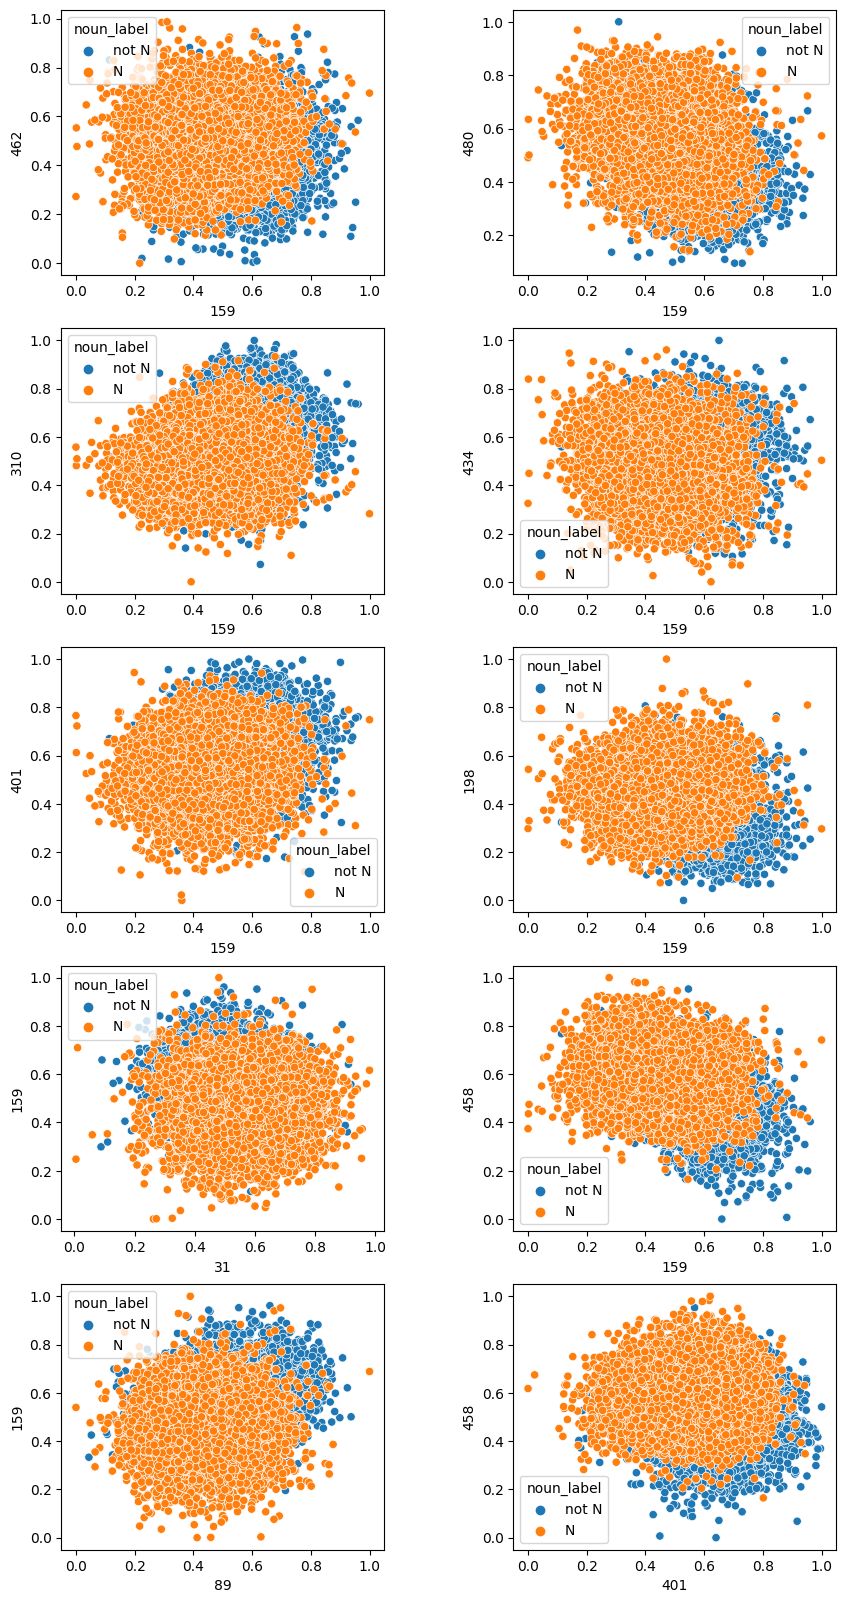

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

# create a figure with 10 subplots
fig, axes = plt.subplots(5, 2, figsize=((10,20)))
fig.subplots_adjust( wspace=0.4)

un_nouns["noun_label"] = un_nouns["noun"].apply(lambda x:"not N" if x == 0 else "N")

sns.scatterplot(data = un_nouns, x = "159", y = "462", hue = "noun_label", ax = axes[0, 0])
sns.scatterplot(data = un_nouns, x = "159", y = "480", hue = "noun_label", ax = axes[0, 1])
sns.scatterplot(data = un_nouns, x = "159", y = "310", hue = "noun_label", ax = axes[1, 0])
sns.scatterplot(data = un_nouns, x = "159", y = "434", hue = "noun_label", ax = axes[1, 1])
sns.scatterplot(data = un_nouns, x = "159", y = "401", hue = "noun_label", ax = axes[2, 0])
sns.scatterplot(data = un_nouns, x = "159", y = "198", hue = "noun_label", ax = axes[2, 1])
sns.scatterplot(data = un_nouns, x = "31", y = "159", hue = "noun_label", ax = axes[3, 0])
sns.scatterplot(data = un_nouns, x = "159", y = "458", hue = "noun_label", ax = axes[3, 1])
sns.scatterplot(data = un_nouns, x = "89", y = "159", hue = "noun_label", ax = axes[4, 0])
sns.scatterplot(data = un_nouns, x = "401", y = "458", hue = "noun_label", ax = axes[4, 1])

plt.savefig("10_scatterplots_NOUN.png", bbox_inches='tight')
plt.show()

### 3 dim (a selection only)

In [8]:
# all dimensions encountered up to now
dims = ["159", "462", "480", "310", "434", "401", "198", "31", "458", "89", "346", "29", "128", "341"]
dims.sort()

# combinations of 3 dimensions having 2 dimensions in common with the previous combinations
tuples = [[i,j,str(k)] for i in dims for j in dims for k in range(512) if i < j and j < str(k)]

dim3 = dimension_clustering_with_ARI(un_nouns, tuples, "noun")
dim3.head(10)

Total number of combinations:  13838
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %
Progress:  100.0 %


,ARI
"['159', '401', '458']",0.345225
"['159', '458', '462']",0.339784
"['159', '462', '480']",0.338672
"['159', '401', '480']",0.333058
"['159', '198', '310']",0.331821
"['159', '198', '434']",0.330779
"['159', '29', '462']",0.328175
"['159', '462', '89']",0.327808
"['159', '480', '89']",0.326609
"['159', '310', '458']",0.324569


### 4 dim

In [9]:
quadruplets = [[i,j,k,l] for i in dims for j in dims for k in dims for l in dims if i < j and j < k and k < l]

dim4 = dimension_clustering_with_ARI(un_nouns, quadruplets, "noun")
dim4.head(10)

Total number of combinations:  1001
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %
Progress:  100.0 %


,ARI
"['159', '198', '458', '462']",0.387473
"['159', '29', '401', '458']",0.385952
"['159', '401', '458', '480']",0.384585
"['159', '198', '401', '458']",0.383918
"['159', '462', '480', '89']",0.381244
"['159', '29', '458', '462']",0.380649
"['159', '401', '458', '89']",0.380195
"['159', '401', '434', '458']",0.378635
"['159', '29', '462', '89']",0.378474
"['159', '29', '31', '462']",0.376954


### 5 dim

In [10]:
quintuplets = [[i,j,k,l,m] for i in dims for j in dims for k in dims for l in dims for m in dims if i < j and j < k and k < l and l < m]

dim5 = dimension_clustering_with_ARI(un_nouns, quintuplets, "noun")
dim5.head(10)

Total number of combinations:  2002
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %
Progress:  100.0 %


,ARI
"['159', '29', '401', '458', '462']",0.419322
"['159', '198', '29', '458', '462']",0.418335
"['159', '29', '401', '458', '89']",0.418211
"['159', '198', '401', '458', '480']",0.417482
"['159', '29', '458', '462', '89']",0.417240
"['159', '401', '458', '480', '89']",0.416866
"['159', '198', '401', '434', '458']",0.415925
"['159', '198', '458', '462', '89']",0.415691
"['159', '401', '434', '458', '480']",0.415443
"['159', '29', '401', '458', '480']",0.413854


### All highlighted dimensions

In [16]:
dim_all = dimension_clustering_with_ARI(un_nouns, [dims]*10, "noun")
dim_all.head(1)

Total number of combinations:  10
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %


,ARI
"['128', '159', '198', '29', '31', '310', '341', '346', '401', '434', '458', '462', '480', '89']",0.461706


# 2. ADJ

In [19]:
# label 1: ADJ, 0: not ADJ
all_a_we["adj"] = 1
all_nv_we = pd.concat([all_n_we, all_v_we])
all_nv_we["adj"] = 0

# Normalization and concatenation
df = pd.concat([all_nv_we, all_a_we]).drop(columns = ["noun"])
norm_df = (df - df.min()) / (df.max() - df.min())

# Removing words having multiple POS
word, count = np.unique(norm_df.index, return_counts=True)
unique_words = [x[0] for x in list(filter(lambda x: x[1] == 1, zip(word, count)))]
un_adj =  norm_df[norm_df.index.isin(unique_words)]

### 1 dim

In [21]:
dim_list_1= [str(i) for i in range(512)] # all dimensions

dim1 = dimension_clustering_with_ARI(un_adj, dim_list_1, "adj")
dim1.head(10)

Total number of combinations:  512
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %
Progress:  100.0 %


,ARI
158,0.031208
220,0.022606
182,0.021585
119,0.018357
39,0.018014
318,0.017234
250,0.017204
464,0.014065
222,0.013240
208,0.012910


### 2 dim

In [22]:
dim_list_2 = [[str(i), str(j)] for i in range(512) for j in range(512) if i < j] # all pairs of dimensions

dim2 = dimension_clustering_with_ARI(un_adj, dim_list_2, "adj")
dim2.head(10)

Total number of combinations:  130816
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %
Progress:  100.0 %


,ARI
"['124', '371']",0.041276
"['220', '485']",0.040976
"['158', '313']",0.038962
"['158', '429']",0.038883
"['182', '220']",0.037327
"['82', '158']",0.037272
"['138', '158']",0.037009
"['220', '439']",0.036879
"['158', '297']",0.036680
"['158', '224']",0.036465


### 3 dim (a selection)

In [24]:
# all dimensions encountered up to now
dims = ["124", "371", "220", "485", "158", "313", "429", "182", "82", "138", "439", "297", "224", "119", "39", "318", "250", "464", "222", "208"]
dims.sort()

# combinations of 3 dimensions having 2 dimensions in common with the previous combinations
tuples = [[i,j,str(k)] for i in dims for j in dims for k in range(512) if i < j and j < str(k)]

dim3 = dimension_clustering_with_ARI(un_adj, tuples, "adj")
dim3.head(10)

Total number of combinations:  39608
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %
Progress:  100.0 %


,ARI
"['220', '39', '464']",0.059282
"['220', '464', '47']",0.055537
"['220', '439', '485']",0.051659
"['220', '297', '464']",0.050943
"['220', '371', '464']",0.050474
"['220', '439', '47']",0.050275
"['220', '250', '464']",0.050233
"['182', '220', '47']",0.049235
"['124', '220', '485']",0.048857
"['182', '220', '464']",0.047817


### 4 dim

In [25]:
quadruplets = [[i,j,k,l] for i in dims for j in dims for k in dims for l in dims if i < j and j < k and k < l]

dim4 = dimension_clustering_with_ARI(un_adj, quadruplets, "adj")
dim4.head(10)

Total number of combinations:  4845
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %
Progress:  100.0 %


,ARI
"['220', '318', '39', '464']",0.068800
"['220', '39', '464', '485']",0.066386
"['318', '371', '39', '464']",0.064961
"['220', '250', '313', '464']",0.064530
"['124', '220', '439', '485']",0.064201
"['124', '220', '39', '464']",0.063799
"['124', '220', '371', '464']",0.063450
"['158', '220', '39', '464']",0.063219
"['220', '371', '439', '464']",0.062771
"['124', '220', '250', '464']",0.062671


### 5 dim

In [26]:
quintuplets = [[i,j,k,l,m] for i in dims for j in dims for k in dims for l in dims for m in dims if i < j and j < k and k < l and l < m]

dim5 = dimension_clustering_with_ARI(un_adj, quintuplets, "adj")
dim5.head(10)

Total number of combinations:  15504
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %
Progress:  100.0 %


,ARI
"['220', '318', '39', '439', '464']",0.077671
"['124', '220', '250', '464', '485']",0.076052
"['220', '313', '318', '464', '485']",0.074982
"['220', '318', '39', '464', '485']",0.074965
"['220', '313', '39', '464', '485']",0.074813
"['124', '220', '39', '464', '485']",0.074463
"['124', '220', '39', '439', '464']",0.074456
"['124', '220', '371', '439', '464']",0.074453
"['124', '220', '318', '464', '485']",0.074361
"['220', '250', '313', '464', '485']",0.074211


### All highlighted dimensions

In [27]:
dim_all = dimension_clustering_with_ARI(un_adj, [dims]*10, "adj")
dim_all.head(1)

Total number of combinations:  10
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %


,ARI
"['119', '124', '138', '158', '182', '208', '220', '222', '224', '250', '297', '313', '318', '371', '39', '429', '439', '464', '485', '82']",0.070862


## 3. VERB

In [28]:
# label 1: VERB, 0: not VERB
all_v_we["verb"] = 1
all_na_we = pd.concat([all_n_we, all_a_we])
all_na_we["verb"] = 0

# Normalization and concatenation
df = pd.concat([all_na_we, all_v_we]).drop(columns = ["adj"])
norm_df = (df - df.min()) / (df.max() - df.min())

# Removing words having multiple POS
word, count = np.unique(norm_df.index, return_counts=True)
unique_words = [x[0] for x in list(filter(lambda x: x[1] == 1, zip(word, count)))]
un_verb =  norm_df[norm_df.index.isin(unique_words)]

### 1 dim

In [30]:
dim_list_1= [str(i) for i in range(512)] # all dimensions

dim1 = dimension_clustering_with_ARI(un_verb, dim_list_1, "verb")
dim1.head(10)

Total number of combinations:  512
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %
Progress:  100.0 %


,ARI
310,0.182514
480,0.180424
159,0.180200
89,0.147733
458,0.143978
401,0.134645
192,0.121288
341,0.113062
29,0.109299
282,0.107606


### 2 dim

In [31]:
dim_list_2 = [[str(i), str(j)] for i in range(512) for j in range(512) if i < j] # all pairs of dimensions

dim2 = dimension_clustering_with_ARI(un_verb, dim_list_2, "verb")
dim2.head(10)

Total number of combinations:  130816
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %
Progress:  100.0 %


,ARI
"['159', '310']",0.312638
"['89', '480']",0.307612
"['310', '458']",0.298188
"['89', '310']",0.296505
"['89', '159']",0.295357
"['159', '480']",0.288542
"['51', '310']",0.280609
"['159', '434']",0.280155
"['159', '401']",0.277426
"['401', '458']",0.277274


### 3 dim (a selection)

In [33]:
# all dimensions encountered up to now
dims = ["159", "310", "89", "480", "458", "51", "434", "401", "192", "341", "29", "282"]
dims.sort()

# combinations of 3 dimensions having 2 dimensions in common with the previous combinations
tuples = [[i,j,str(k)] for i in dims for j in dims for k in range(512) if i < j and j < str(k)]

dim3 = dimension_clustering_with_ARI(un_verb, tuples, "verb")
dim3.head(10)

Total number of combinations:  8573
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %
Progress:  100.0 %


,ARI
"['310', '458', '89']",0.406207
"['159', '310', '89']",0.402576
"['310', '480', '89']",0.394293
"['159', '480', '89']",0.387117
"['341', '480', '89']",0.379913
"['159', '310', '434']",0.378626
"['401', '480', '89']",0.377612
"['159', '401', '89']",0.376832
"['159', '310', '458']",0.374929
"['159', '401', '458']",0.373520


### 4 dim

In [34]:
quadruplets = [[i,j,k,l] for i in dims for j in dims for k in dims for l in dims if i < j and j < k and k < l]

dim4 = dimension_clustering_with_ARI(un_verb, quadruplets, "verb")
dim4.head(10)

Total number of combinations:  495
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  49.0 %
Progress:  59.0 %
Progress:  69.0 %
Progress:  79.0 %
Progress:  89.0 %
Progress:  99.0 %


,ARI
"['310', '341', '458', '89']",0.463831
"['401', '458', '480', '89']",0.458983
"['159', '310', '341', '89']",0.455628
"['159', '310', '458', '89']",0.455580
"['159', '282', '310', '89']",0.453827
"['29', '310', '458', '89']",0.453396
"['159', '310', '434', '89']",0.450756
"['159', '401', '458', '89']",0.450753
"['159', '29', '310', '89']",0.445668
"['159', '192', '282', '310']",0.443738


### 5 dim

In [35]:
quintuplets = [[i,j,k,l,m] for i in dims for j in dims for k in dims for l in dims for m in dims if i < j and j < k and k < l and l < m]

dim5 = dimension_clustering_with_ARI(un_verb, quintuplets, "verb")
dim5.head(10)

Total number of combinations:  792
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %
Progress:  100.0 %


,ARI
"['159', '282', '310', '458', '89']",0.504208
"['159', '310', '341', '458', '89']",0.502311
"['159', '192', '282', '310', '341']",0.497156
"['192', '401', '458', '480', '89']",0.495501
"['159', '192', '282', '310', '434']",0.495393
"['29', '310', '341', '458', '89']",0.493365
"['159', '29', '401', '458', '89']",0.492323
"['159', '282', '310', '341', '458']",0.490776
"['159', '192', '310', '434', '89']",0.490550
"['159', '310', '434', '458', '89']",0.490507


### All highlighted dimensions

In [36]:
dim_all = dimension_clustering_with_ARI(un_verb, [dims]*10, "verb")
dim_all.head(1)

Total number of combinations:  10
Progress:  0.0 %
Progress:  10.0 %
Progress:  20.0 %
Progress:  30.0 %
Progress:  40.0 %
Progress:  50.0 %
Progress:  60.0 %
Progress:  70.0 %
Progress:  80.0 %
Progress:  90.0 %


,ARI
"['159', '192', '282', '29', '310', '341', '401', '434', '458', '480', '51', '89']",0.593026
